Epoch 0/200 | Discriminator Loss: 0.5337279736995697 | Generator Loss: 0.8828297257423401
Epoch 1/200 | Discriminator Loss: 0.5367496609687805 | Generator Loss: 0.8079249858856201
Epoch 2/200 | Discriminator Loss: 0.5273558497428894 | Generator Loss: 0.825336217880249
Epoch 3/200 | Discriminator Loss: 0.5393378436565399 | Generator Loss: 0.7887856364250183
Epoch 4/200 | Discriminator Loss: 0.5399681031703949 | Generator Loss: 0.796552836894989
Epoch 5/200 | Discriminator Loss: 0.5556007325649261 | Generator Loss: 0.8075708746910095
Epoch 6/200 | Discriminator Loss: 0.5442723035812378 | Generator Loss: 0.8555177450180054
Epoch 7/200 | Discriminator Loss: 0.5600491166114807 | Generator Loss: 0.7774984836578369
Epoch 8/200 | Discriminator Loss: 0.5186602026224136 | Generator Loss: 0.8086761236190796
Epoch 9/200 | Discriminator Loss: 0.5588854253292084 | Generator Loss: 0.846459150314331
Epoch 10/200 | Discriminator Loss: 0.5351185202598572 | Generator Loss: 0.866773247718811
Epoch 11/200 

Epoch 92/200 | Discriminator Loss: 0.6763930022716522 | Generator Loss: 0.6128095984458923
Epoch 93/200 | Discriminator Loss: 0.6402183175086975 | Generator Loss: 0.6389085054397583
Epoch 94/200 | Discriminator Loss: 0.6511092185974121 | Generator Loss: 0.6450672149658203
Epoch 95/200 | Discriminator Loss: 0.6386714279651642 | Generator Loss: 0.6253257989883423
Epoch 96/200 | Discriminator Loss: 0.6918444633483887 | Generator Loss: 0.6162148714065552
Epoch 97/200 | Discriminator Loss: 0.6467417180538177 | Generator Loss: 0.6068918704986572
Epoch 98/200 | Discriminator Loss: 0.6695604622364044 | Generator Loss: 0.5682520866394043
Epoch 99/200 | Discriminator Loss: 0.6725573837757111 | Generator Loss: 0.61757892370224
Epoch 100/200 | Discriminator Loss: 0.6413220763206482 | Generator Loss: 0.5490227937698364
Epoch 101/200 | Discriminator Loss: 0.6490455865859985 | Generator Loss: 0.5907291769981384
Epoch 102/200 | Discriminator Loss: 0.6843095123767853 | Generator Loss: 0.594460308551788

Epoch 183/200 | Discriminator Loss: 0.8231731653213501 | Generator Loss: 0.3744174540042877
Epoch 184/200 | Discriminator Loss: 0.8017941117286682 | Generator Loss: 0.4059006869792938
Epoch 185/200 | Discriminator Loss: 0.8379355669021606 | Generator Loss: 0.37071555852890015
Epoch 186/200 | Discriminator Loss: 0.8176586627960205 | Generator Loss: 0.4078059196472168
Epoch 187/200 | Discriminator Loss: 0.7991514503955841 | Generator Loss: 0.4491428732872009
Epoch 188/200 | Discriminator Loss: 0.8243433833122253 | Generator Loss: 0.4152688980102539
Epoch 189/200 | Discriminator Loss: 0.7871273756027222 | Generator Loss: 0.39617204666137695
Epoch 190/200 | Discriminator Loss: 0.8173457682132721 | Generator Loss: 0.3896409273147583
Epoch 191/200 | Discriminator Loss: 0.827910304069519 | Generator Loss: 0.3743140697479248
Epoch 192/200 | Discriminator Loss: 0.7939517498016357 | Generator Loss: 0.39283424615859985
Epoch 193/200 | Discriminator Loss: 0.8027375340461731 | Generator Loss: 0.416

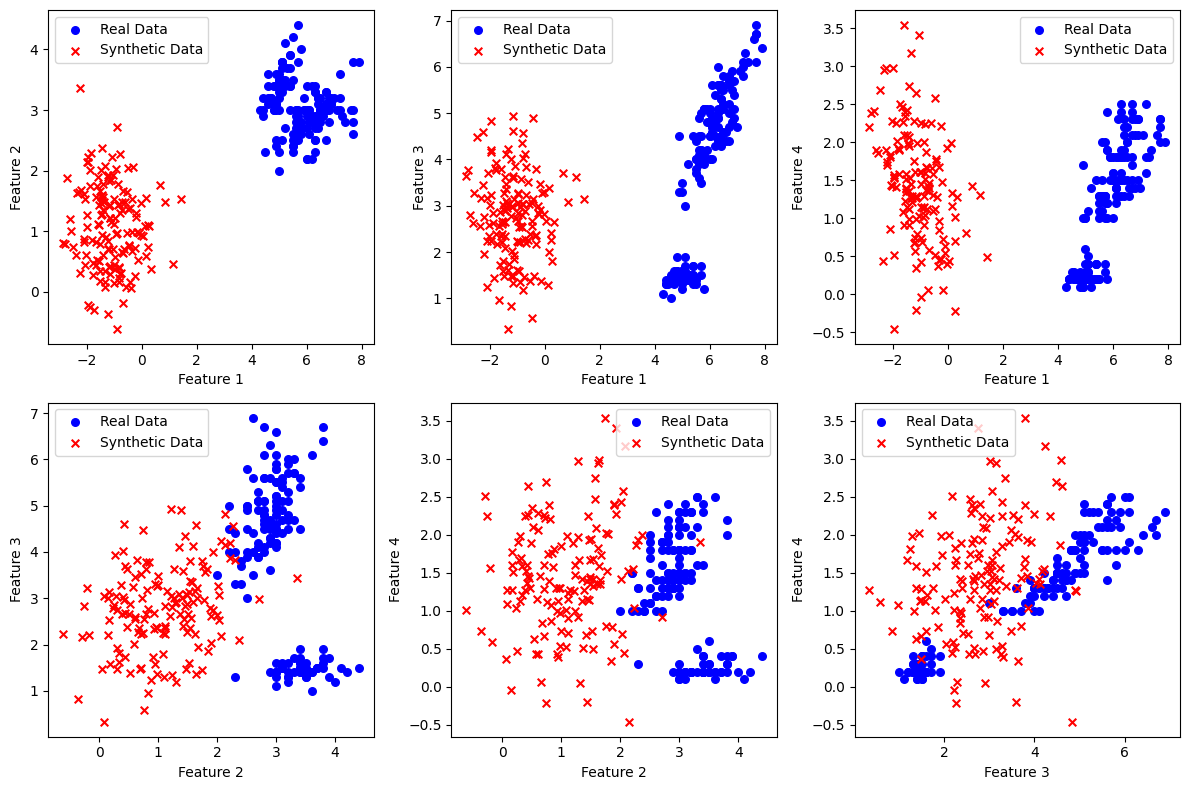

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load and Preprocess the Iris Dataset
iris = load_iris()
x_train = iris.data

# Build the GAN model
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_shape=(100,), activation='relu'))
    model.add(Dense(4, activation='linear'))  # Output 4 features
    return model

def build_discriminator():
    model = Sequential()
    model.add(Dense(128, input_shape=(4,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Compile the Models
generator.compile(loss='mean_squared_error', optimizer=Adam(0.0002, 0.5))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training Loop
epochs = 200
batch_size = 16

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_samples = x_train[idx]
    fake_samples = generator.predict(np.random.normal(0, 1, (batch_size, 100)), verbose=0)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real_labels)

    # Print progress
    print(f"Epoch {epoch}/{epochs} | Discriminator Loss: {0.5 * (d_loss_real[0] + d_loss_fake[0])} | Generator Loss: {g_loss}")

# Generating Synthetic Data
synthetic_data = generator.predict(np.random.normal(0, 1, (150, 100)), verbose=0)

# Create scatter plots for feature pairs
plt.figure(figsize=(12, 8))
plot_idx = 1

for i in range(4):
    for j in range(i + 1, 4):
        plt.subplot(2, 3, plot_idx)
        plt.scatter(x_train[:, i], x_train[:, j], label='Real Data', c='blue', marker='o', s=30)
        plt.scatter(synthetic_data[:, i], synthetic_data[:, j], label='Synthetic Data', c='red', marker='x', s=30)
        plt.xlabel(f'Feature {i + 1}')
        plt.ylabel(f'Feature {j + 1}')
        plt.legend()
        plot_idx += 1

plt.tight_layout()
plt.show()


In [17]:
iris = load_iris()
x_train = iris.data

In [19]:
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_shape=(100,), activation='relu'))
    model.add(Dense(4, activation='linear'))  # Output 4 features
    return model

def build_discriminator():
    model = Sequential()
    model.add(Dense(128, input_shape=(4,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

In [20]:
generator.compile(loss='mean_squared_error', optimizer=Adam(0.0002, 0.5))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5),
                      metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [ ]:
epochs = 200
batch_size = 16

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_samples = x_train[idx]
    fake_samples = generator.predict(np.random.normal(0, 1, (batch_size, 100)), verbose=0)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real_labels)

    print(f"Epoch {epoch}/{epochs} | Discriminator Loss: {0.5 * (d_loss_real[0] + d_loss_fake[0])} | Generator Loss: {g_loss}")

C:\Users\roshi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch 0/200 | Discriminator Loss: 0.6336984634399414 | Generator Loss: 0.6712576150894165
Epoch 1/200 | Discriminator Loss: 0.6762775182723999 | Generator Loss: 0.6682971715927124
Epoch 2/200 | Discriminator Loss: 0.6832332611083984 | Generator Loss: 0.6699442267417908
Epoch 3/200 | Discriminator Loss: 0.6883726119995117 | Generator Loss: 0.6678845882415771
Epoch 4/200 | Discriminator Loss: 0.690213680267334 | Generator Loss: 0.6616929173469543
Epoch 5/200 | Discriminator Loss: 0.6882634162902832 | Generator Loss: 0.6595401167869568
Epoch 6/200 | Discriminator Loss: 0.6873168349266052 | Generator Loss: 0.6581984758377075
Epoch 7/200 | Discriminator Loss: 0.6879143714904785 | Generator Loss: 0.6603295803070068
Epoch 8/200 | Discriminator Loss: 0.6855922341346741 | Generator Loss: 0.659404993057251
Epoch 9/200 | Discriminator Loss: 0.684700608253479 | Generator Loss: 0.6586657762527466
Epoch 10/200 | Discriminator Loss: 0.6859221458435059 | Generator Loss: 0.6556427478790283
Epoch 11/200

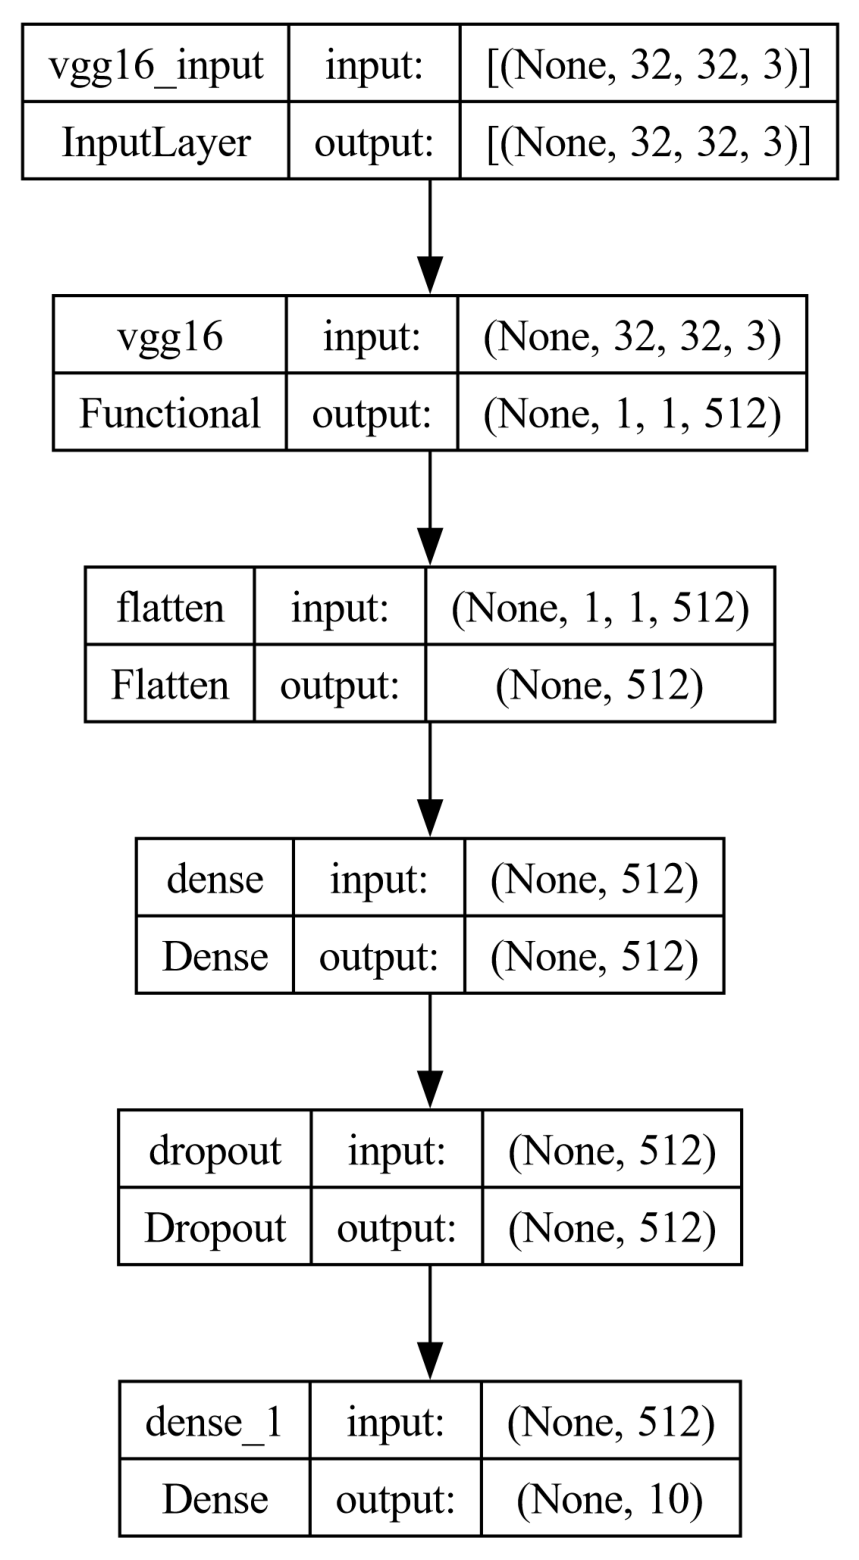

In [9]:
plot_model(model, to_file='cnn.png', show_shapes=True,
           show_layer_names=True, dpi=300)

plt.figure(figsize=(20, 20))
img = plt.imread('cnn.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [10]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 158s 124ms/step - loss: 1.7805 - accuracy: 0.3744 - val_loss: 1.4673 - val_accuracy: 0.4995
Epoch 2/10
1250/1250 [==============================] - 155s 124ms/step - loss: 1.4674 - accuracy: 0.4908 - val_loss: 1.3565 - val_accuracy: 0.5349
Epoch 3/10
1250/1250 [==============================] - 151s 121ms/step - loss: 1.3736 - accuracy: 0.5232 - val_loss: 1.2988 - val_accuracy: 0.5508
Epoch 4/10
1250/1250 [==============================] - 150s 120ms/step - loss: 1.3196 - accuracy: 0.5418 - val_loss: 1.2621 - val_accuracy: 0.5626
Epoch 5/10
1250/1250 [==============================] - 4374s 4s/step - loss: 1.2839 - accuracy: 0.5538 - val_loss: 1.2355 - val_accuracy: 0.5704
Epoch 6/10
1250/1250 [==============================] - 141s 113ms/step - loss: 1.2518 - accuracy: 0.5651 - val_loss: 1.2137 - val_accuracy: 0.5751
Epoch 7/10
1250/1250 [==============================] - 6222s 5s/step - loss: 1.2231 - accuracy: 0.5745 - val_loss

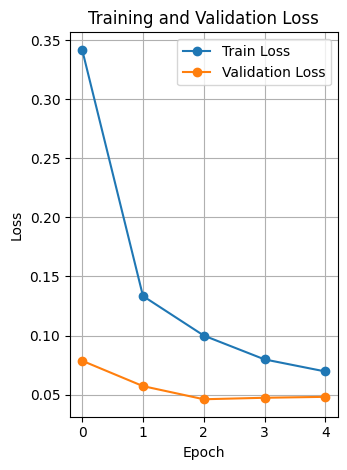

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc * 100:.2f}%')

In [21]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 2s 7ms/step


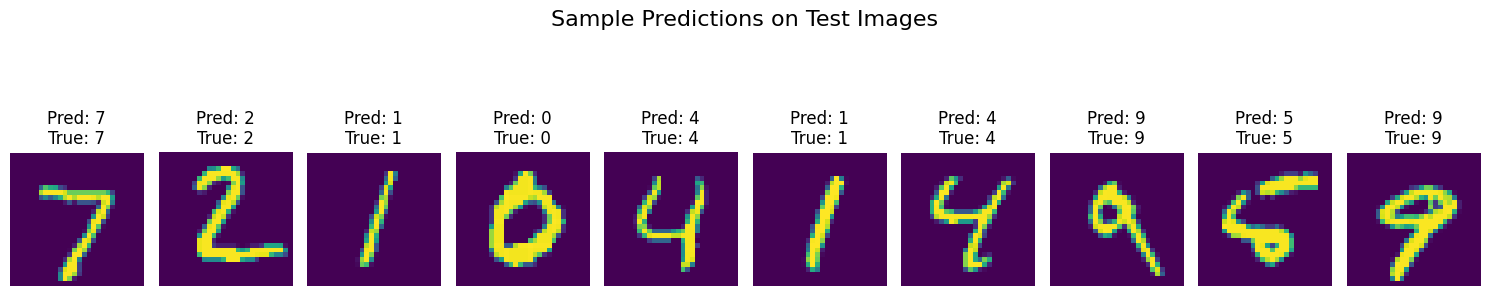

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<Figure size 640x480 with 0 Axes>

In [ ]:
sample = x_test[0].reshape(1, 32, 32, 3)
prediction = model.predict(sample)
predicted_class = class_names[np.argmax(prediction)]

plt.imshow(x_test[0])
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()